In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 
import torch 

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])

In [3]:
train_dataset = datasets.MNIST(root='./data',train=True,transform=transform,download=True)
test_dataset = datasets.MNIST(root='./data',train=False,transform=transform,download=True)

100%|██████████| 9.91M/9.91M [00:16<00:00, 599kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 137kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.37MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 821kB/s]


In [4]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

In [5]:
examples = enumerate(train_loader)
batch_idx,(example_data,example_targets) = next(examples)

In [6]:
print(example_data.shape)

torch.Size([64, 1, 28, 28])


In [7]:
print(example_targets[:5])

tensor([7, 7, 1, 0, 2])


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,32,kernel_size=3)
        self.conv2 = nn.Conv2d(32,64,kernel_size=3)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(9216,128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2)
        x = self.dropout1(x)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [11]:
model = CNN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
criterion = nn.NLLLoss()

for epoch in range(1,6):
    model.train()
    for batch_idx,(data,target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
    print(f"Epoch :{epoch} , loss : {loss.item():.4f}")

Epoch :1 , loss : 0.1151
Epoch :2 , loss : 0.0071
Epoch :3 , loss : 0.0708
Epoch :4 , loss : 0.0606
Epoch :5 , loss : 0.1238


In [15]:
correct = 0 
total = 0 

with torch.no_grad():
    for data,target in test_loader:
        outputs = model(data)
        predicted = torch.argmax(outputs,dim=1)
        correct += (predicted == target).sum().item()
        total += target.size(0)
        
accuracy = correct / total 
print(f"Test Accuracy: {accuracy*100:.2f}%")

Test Accuracy: 98.40%


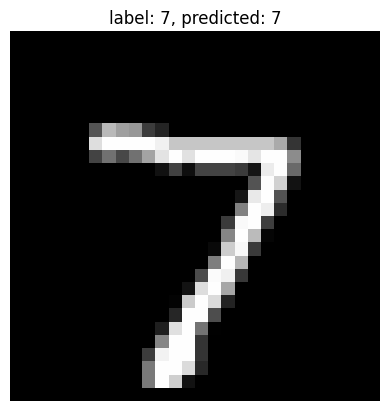

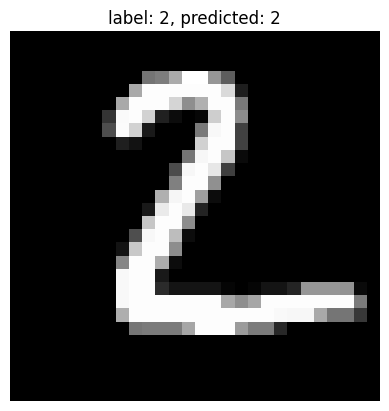

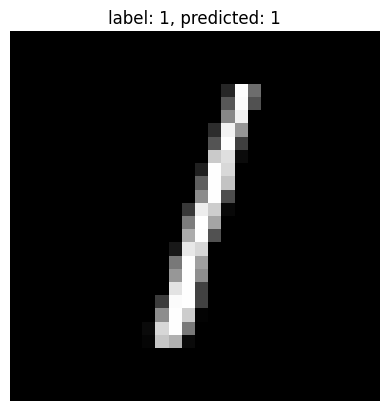

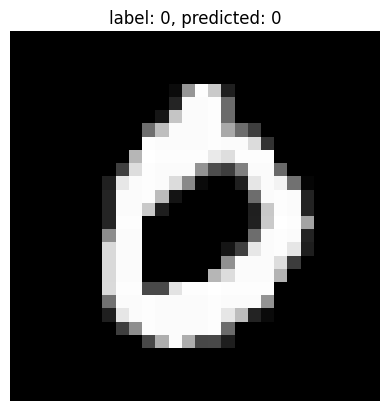

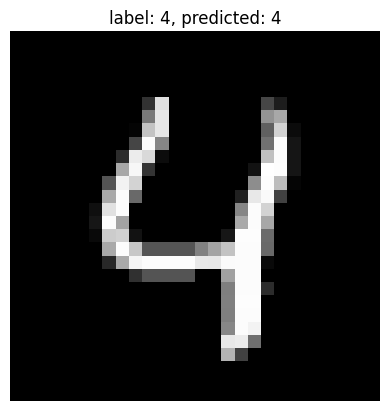

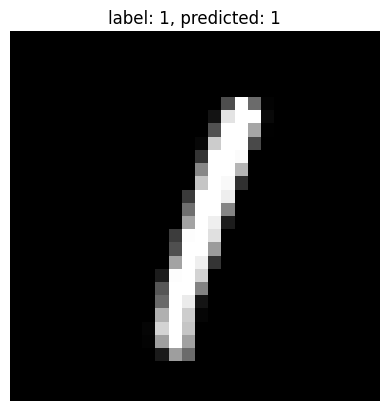

In [17]:
import matplotlib.pyplot as plt 
dataiter = iter(test_loader)
images,labels = next(dataiter)
outputs =model(images)
predicted = torch.argmax(outputs,dim=1)

for i in range(6):
    plt.imshow(images[i].squeeze(),cmap='gray')
    plt.title(f"label: {labels[i]}, predicted: {predicted[i]}")
    plt.axis('off')
    plt.show()